<a href="https://colab.research.google.com/github/BenShieh233/NLP-Text-Mining/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import string
import re

import nltk

nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer

from sklearn.feature_extraction import _stop_words

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn import metrics

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/INFOSYS765/covid_tweets.csv", encoding="utf-8")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂ’s getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


### Q1 Data Transformation

In [5]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [6]:
# Label 'positive' and 'extremely positive' to value 1
def binary_classifier(df):
  df['sentiment_score'] = df['Sentiment'].apply(lambda x: 1 if x in ['Positive','Extremely Positive'] else 0) # transform values 'negative' and 'extremely negative' to value 0
  df = df[df['Sentiment'] != 'Neutral'].drop(columns = 'Sentiment').reset_index() # Drop observatins with the value 'neutral'
  df = df.drop(columns = 'index')
  return df

In [7]:
df1 = binary_classifier(df)

In [8]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,sentiment_score
0,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
1,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
2,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
3,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
4,3804,48756,"ÃœT: 36.319708,-82.363649",16-03-2020,As news of the regionÂ’s first confirmed COVID...,1
...,...,...,...,...,...,...
33439,44949,89901,OHIO,14-04-2020,I never that weÂ’d be in a situation &amp; wor...,1
33440,44950,89902,NaN,14-04-2020,@MrSilverScott you are definitely my man. I fe...,1
33441,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,0
33442,44953,89905,NaN,14-04-2020,You know itÂ’s getting tough when @KameronWild...,1


### Q2 Define the text preprocessing function

In [9]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
ps = PorterStemmer()
def clean(doc): # doc is a string of text
    doc = re.sub(r"https\S+", "", doc) # remove the url after each tweet
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()]) # remove punctuations and digits
    doc = " ".join([token.lower() for token in doc.split() if token not in stopwords]) # lowercase of letters, tokenization and remove the stopwords
    doc = " ".join([ps.stem(token) for token in doc.split()]) # Stemming
    return doc


In [10]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: clean(x))

In [11]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,sentiment_score
0,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,1
1,3801,48753,Vagabonds,16-03-2020,coronaviru australia woolworth elderli disabl ...,1
2,3802,48754,NaN,16-03-2020,my food stock pleas dont panic there will be e...,1
3,3803,48755,NaN,16-03-2020,me readi supermarket covid outbreak not im par...,0
4,3804,48756,"ÃœT: 36.319708,-82.363649",16-03-2020,as news regionâ’ confirm covid case came sulli...,1
...,...,...,...,...,...,...
33439,44949,89901,OHIO,14-04-2020,i weâ’d situat amp world go supermarket pick p...,1
33440,44950,89902,NaN,14-04-2020,mrsilverscott definit man i feel like fall nee...,1
33441,44952,89904,NaN,14-04-2020,respons complaint provid cite covid relat dela...,0
33442,44953,89905,NaN,14-04-2020,you know itâ’ get tough kameronwild ration toi...,1


### Q3 Use the tweet content to predict tweet sentiment.

#### (1) Split the data into training and test sets.

In [12]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = df1['OriginalTweet']
y = df1['sentiment_score']
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33444,) (33444,)
(25083,) (25083,)
(8361,) (8361,)


#### (2) Use CountVectorizer to generate vectors to represent each review.

In [15]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(25083, 34393) (8361, 34393)


In [16]:
X_train_dtm

<25083x34393 sparse matrix of type '<class 'numpy.int64'>'
	with 412921 stored elements in Compressed Sparse Row format>

#### (3) Use these vectors and Naive Bayes to predict the review sentiment.

In [17]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 12.5 ms, sys: 0 ns, total: 12.5 ms
Wall time: 16.3 ms


Accuracy:  0.7910537017103217
Recall: 0.8268843659136659
F1 score: 0.8088830543704191


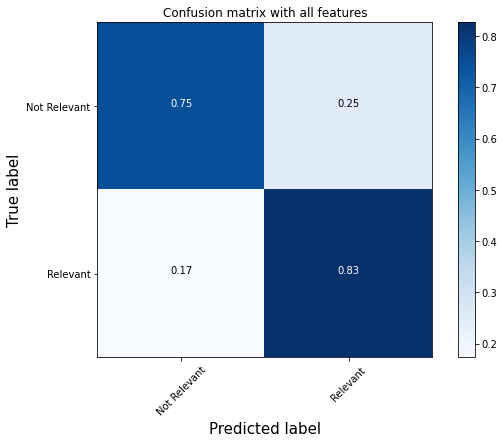

In [18]:
# Step 4: Evaluate the classifier using various measures

# Function to plot confusion matrix. 
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    
# Print accuracy:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

#### (4) Use logistics regression with the balanced class to predict the sentiments.

Accuracy:  0.8625762468604234
Recall: 0.8749720420487587
F1 score: 0.8719491808759612


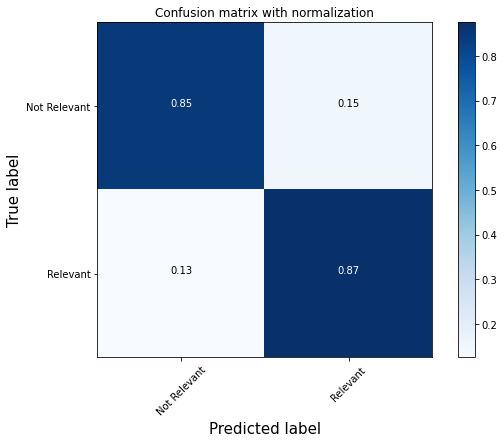

In [38]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

#### (5) Use SVM with the balanced dataset to predict the review sentiment.

Accuracy:  0.841526133237651
Recall: 0.8584209349138895
F1 score: 0.8527941339851127


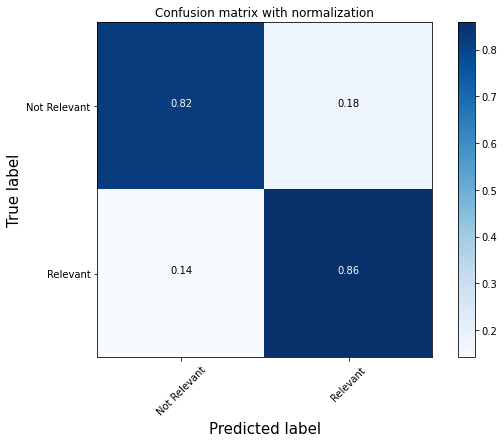

In [39]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

### Q4 Summary

In the prediction part, I applied three different approaches, the Naive Bayes Classifier, the logistics regression, and the SVM to predict the sentiment scores of the test data. Among all of the classifiers, the logistics regression performs the best with the highest F1-score of 0.87. The SVM's predictions was the second, outputing a F1-score of 0.85 while the Naive Bayes provides a F1-score of 0.812.

### Q5 Bonus Questions

#### (1) Bag of words

In [40]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(ngram_range=(1,3), preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)


(25083, 631705) (8361, 631705)


##### (1.1) Naive Bayes

In [41]:
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm)

CPU times: user 57.3 ms, sys: 12 ms, total: 69.4 ms
Wall time: 73 ms


Accuracy:  0.7743092931467528
Recall: 0.8608812346231268
F1 score: 0.8031298904538341


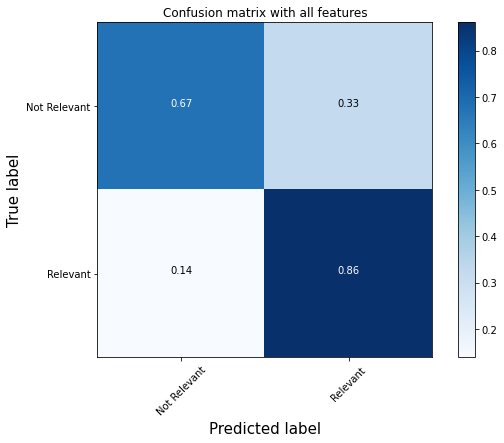

In [43]:
# Print accuracy:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

##### (1.2) Logistics Regression

Accuracy:  0.8557588805166846
Recall: 0.8725117423395213
F1 score: 0.8661190053285968


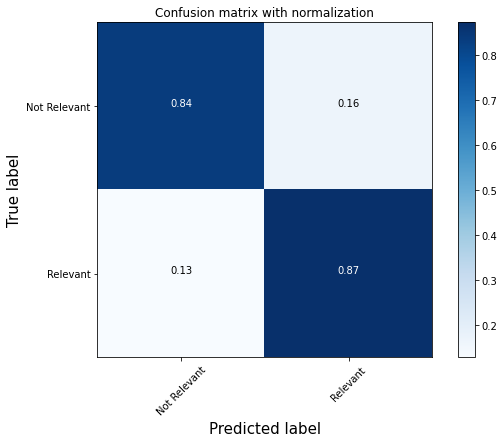

In [44]:
logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

##### (1.3) SVM

Accuracy:  0.8589881593110872
Recall: 0.8796689778573026
F1 score: 0.8696517412935323


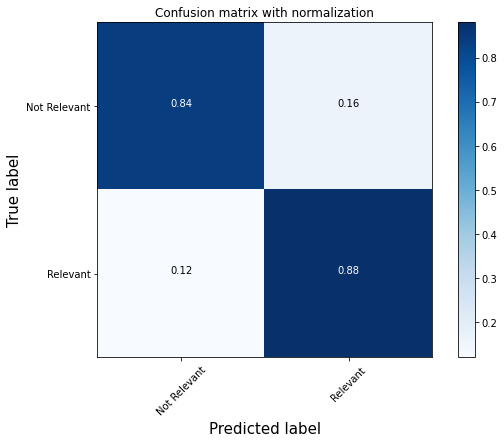

In [45]:
vect = CountVectorizer(ngram_range=(1,3), preprocessor=clean) # Step-1
X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

By using the Bag of words text representation method, the F1-scores of the Naive Bayes classifier and the logistics regression decrease. On the contrary, the SVM classifier performs the best by improving the F1-score from 0.85 to 0.87.

#### (2) TF-IDF representation

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(preprocessor=clean, ngram_range = (1,3))
X_train_dtm = tfidf.fit_transform(X_train)
X_test_dtm = tfidf.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(25083, 631705) (8361, 631705)


##### (2.1) Naive Bayes

In [48]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 89.5 ms, sys: 1.02 ms, total: 90.5 ms
Wall time: 213 ms


Accuracy:  0.7493122832197106
Recall: 0.9416237978080966
F1 score: 0.8006846709775581


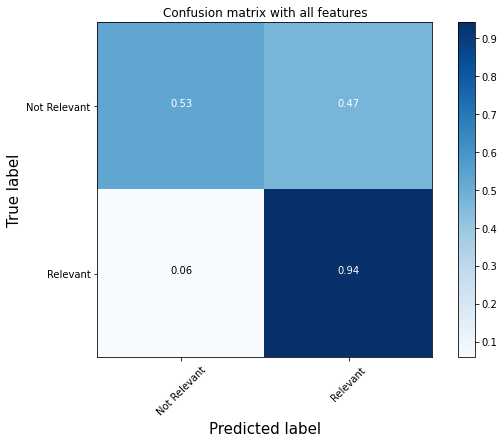

In [49]:
# Print accuracy:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
    
# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

##### (2.2) Logistics Regression

Accuracy:  0.8231072838177251
Recall: 0.8358309103108924
F1 score: 0.8348039763207862


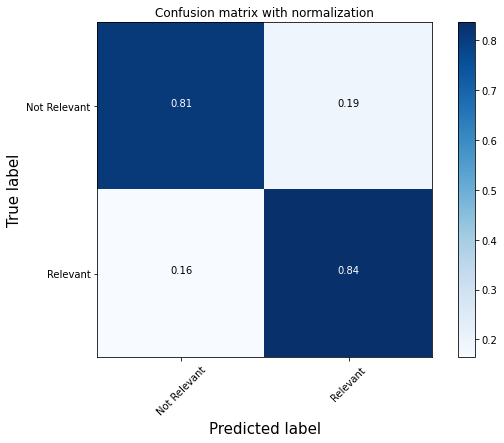

In [50]:
logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

##### (2.3) SVM

Accuracy:  0.8518119842124148
Recall: 0.8711697606799373
F1 score: 0.8627755011629195


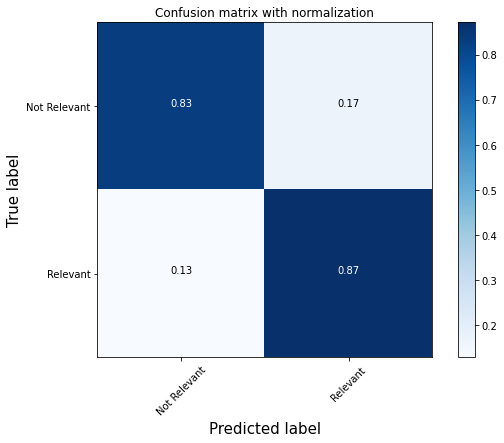

In [51]:
classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train_dtm, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

By using the TF-IDF text representation with n-grams from 1 to 3, the SVM outperforms the other two classifers by improving its F1-score to 0.86, while the others' F1-score decrease simultaneously. 

#### (3) Word Embedding or Document Embedding

##### (3.1) Preparing Vectors for Tweets

In [25]:
from gensim.models import Word2Vec
tweets = df1['OriginalTweet'].apply(lambda x: x.split())
w2v_model = Word2Vec(tweets, size=300, window=5, min_count=2, workers=16, seed = 34)

In [56]:
def word_vector(tweet):
  vec = np.zeros(300).reshape((1, 300))
  count = 0
  for word in tweet:
    try:
      vec += w2v_model[word].reshape((1, 300))
      count += 1
    except KeyError:
      continue
  if count != 0:
    vec /= count
  return vec

In [57]:
wordvec_arrays = np.zeros(((len(tweets)), 300))
for i in range(len(tweets)):
  wordvec_arrays[i,:] = word_vector(tweets[i])

In [58]:
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.363447,-0.294811,-0.020796,0.096552,0.159397,-0.015228,0.279369,-0.068683,0.187676,0.045649,...,0.271331,0.055288,0.161028,-0.230850,0.294848,-0.117322,-0.041281,0.053718,0.122380,-0.038740
1,0.644120,-0.519401,-0.040454,0.129201,0.191703,0.112008,0.291837,-0.079559,0.109901,0.124466,...,0.332081,0.213502,-0.090339,-0.576539,0.349629,-0.423677,-0.019160,0.144996,0.239099,0.050753
2,0.595771,-0.451649,-0.144241,0.108994,-0.003102,-0.029049,0.415259,-0.065599,0.112860,0.030410,...,0.404063,0.180608,0.132144,-0.378418,0.178602,-0.031381,-0.059790,0.079066,0.538456,-0.043671
3,0.608977,-0.444382,-0.132595,0.060604,-0.051587,0.122360,0.408640,-0.153531,-0.047992,0.055885,...,0.308520,0.181426,0.060875,-0.519460,0.206513,-0.147702,0.022501,0.085853,0.564600,-0.038606
4,0.497242,-0.340885,-0.167460,0.185959,-0.026932,0.124842,0.328093,-0.123740,0.077996,0.079604,...,0.183208,0.048982,0.168467,-0.296680,0.198406,-0.052622,0.108269,0.095911,0.344861,0.029497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33439,0.534114,-0.232819,-0.037035,0.095522,0.023325,0.175626,0.327533,-0.102110,-0.036340,0.131844,...,0.259801,0.039711,0.198987,-0.391784,0.065228,-0.218810,0.098413,0.105008,0.324224,0.062732
33440,0.511177,-0.339124,-0.037076,0.103551,-0.001348,0.206920,0.301285,0.008318,-0.032171,0.156037,...,0.218922,0.003495,0.199930,-0.376674,0.075932,-0.260833,0.016034,0.049422,0.312369,0.123828
33441,0.443702,-0.159481,-0.036290,0.267735,0.249707,-0.044319,0.210942,-0.086813,0.196336,-0.012426,...,0.361037,0.149299,0.003925,-0.134626,0.404021,-0.031300,-0.053833,0.196910,0.018478,0.040903
33442,0.913654,-0.252907,-0.084015,0.281287,-0.126588,0.191148,0.461515,-0.132735,-0.162266,0.136288,...,0.367689,0.154722,0.456398,-0.525083,-0.064620,-0.154753,0.170071,0.169261,0.620058,-0.051631


In [59]:
wordvec_df = pd.concat([wordvec_df, df1['sentiment_score']], axis = 1)

In [60]:
wordvec_df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,sentiment_score
0,0.363447,-0.294811,-0.020796,0.096552,0.159397,-0.015228,0.279369,-0.068683,0.187676,0.045649,...,0.055288,0.161028,-0.230850,0.294848,-0.117322,-0.041281,0.053718,0.122380,-0.038740,1
1,0.644120,-0.519401,-0.040454,0.129201,0.191703,0.112008,0.291837,-0.079559,0.109901,0.124466,...,0.213502,-0.090339,-0.576539,0.349629,-0.423677,-0.019160,0.144996,0.239099,0.050753,1
2,0.595771,-0.451649,-0.144241,0.108994,-0.003102,-0.029049,0.415259,-0.065599,0.112860,0.030410,...,0.180608,0.132144,-0.378418,0.178602,-0.031381,-0.059790,0.079066,0.538456,-0.043671,1
3,0.608977,-0.444382,-0.132595,0.060604,-0.051587,0.122360,0.408640,-0.153531,-0.047992,0.055885,...,0.181426,0.060875,-0.519460,0.206513,-0.147702,0.022501,0.085853,0.564600,-0.038606,0
4,0.497242,-0.340885,-0.167460,0.185959,-0.026932,0.124842,0.328093,-0.123740,0.077996,0.079604,...,0.048982,0.168467,-0.296680,0.198406,-0.052622,0.108269,0.095911,0.344861,0.029497,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33439,0.534114,-0.232819,-0.037035,0.095522,0.023325,0.175626,0.327533,-0.102110,-0.036340,0.131844,...,0.039711,0.198987,-0.391784,0.065228,-0.218810,0.098413,0.105008,0.324224,0.062732,1
33440,0.511177,-0.339124,-0.037076,0.103551,-0.001348,0.206920,0.301285,0.008318,-0.032171,0.156037,...,0.003495,0.199930,-0.376674,0.075932,-0.260833,0.016034,0.049422,0.312369,0.123828,1
33441,0.443702,-0.159481,-0.036290,0.267735,0.249707,-0.044319,0.210942,-0.086813,0.196336,-0.012426,...,0.149299,0.003925,-0.134626,0.404021,-0.031300,-0.053833,0.196910,0.018478,0.040903,0
33442,0.913654,-0.252907,-0.084015,0.281287,-0.126588,0.191148,0.461515,-0.132735,-0.162266,0.136288,...,0.154722,0.456398,-0.525083,-0.064620,-0.154753,0.170071,0.169261,0.620058,-0.051631,1


In [61]:
wordvec_df.iloc[:,0:300].values

array([[ 0.36344674, -0.29481076, -0.02079613, ...,  0.05371755,
         0.12237969, -0.03873953],
       [ 0.64412035, -0.51940113, -0.04045441, ...,  0.14499633,
         0.23909891,  0.05075263],
       [ 0.59577114, -0.45164871, -0.14424121, ...,  0.07906606,
         0.53845576, -0.04367131],
       ...,
       [ 0.44370172, -0.15948115, -0.03628977, ...,  0.19691046,
         0.01847783,  0.04090307],
       [ 0.91365443, -0.25290656, -0.08401535, ...,  0.16926058,
         0.6200583 , -0.05163086],
       [ 0.42261538, -0.2942819 , -0.07306015, ...,  0.02230516,
         0.15528102,  0.09344303]])

In [62]:
# Step 1: train-test split
X = wordvec_df.iloc[:,0:300].values
y = wordvec_df['sentiment_score'].values
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33444, 300) (33444,)
(25083, 300) (25083,)
(8361, 300) (8361,)


##### (3.1) Naive Bayes

In [ ]:
# Step 3: Train the classifier and predict for test data
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train, y_train) # train the model(timing it with an IPython "magic command")
y_pred = nb.predict(X_test) # make class predictions for X_test_dtm

ValueError: ignored

AttributeError: ignored

The embedded words failed to be input into the Naive Bayes function due to the negative values in data.

##### (3.2) Logistics Regression

Accuracy:  0.6841286927401029
Recall: 0.6915678819056139
F1 score: 0.7007365439093484


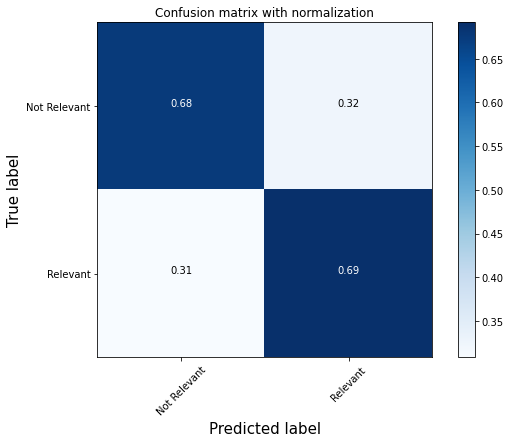

In [63]:
logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

#####(3.3) SVM

Accuracy:  0.7074512618107882
Recall: 0.7076716618206218
F1 score: 0.7212217916571688


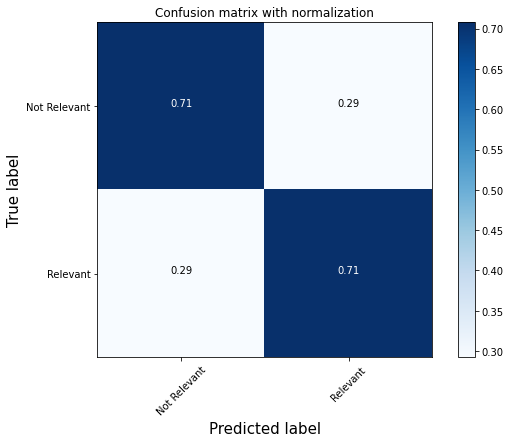

In [64]:
classifier = LinearSVC(class_weight='balanced') # instantiate a logistic regression model
classifier.fit(X_train, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = classifier.predict(X_test)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))
print("F1 score:",metrics.f1_score(y_test, y_pred_class))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

However, the words embeddings do not improve our prediction performance using logistics regression. Conversely, the F1-score decreases to 0.70 after words embeddings. Moreover, the prediction results of SVM also decrease from 0.85 to 0.72.

#### (4) Deep Learning Model - LSTM

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding

In [19]:
import keras
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
# Defining the model input length.
input_length = 100

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
vocab_length = 60000
X_data, y_data = np.array(df1['OriginalTweet']), np.array(df1['sentiment_score'])
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 60000


In [37]:
# Step 1: train-test split
X = df1['OriginalTweet']
y = df1['sentiment_score']
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33444,) (33444,)
(25083,) (25083,)
(8361,) (8361,)


In [38]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (25083, 100)
X_test.shape : (8361, 100)


In [39]:
tweets = df1['OriginalTweet'].apply(lambda x: x.split())
w2v_model = Word2Vec(tweets, size=100, window=5, min_count=2, workers=16, seed = 34)

In [40]:
Embedding_dimensions = 100

embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if w2v_model.wv.__contains__(word):
        embedding_matrix[token] = w2v_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (60000, 100)


In [41]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [42]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          6000000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 200)         240800    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 96, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                   

In [43]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [44]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12
23/23 [==============================] - 266s 11s/step - loss: 0.6352 - accuracy: 0.6338 - val_loss: 0.5970 - val_accuracy: 0.6676 - lr: 0.0010
Epoch 2/12
23/23 [==============================] - 249s 11s/step - loss: 0.5916 - accuracy: 0.6760 - val_loss: 0.5885 - val_accuracy: 0.6788 - lr: 0.0010
Epoch 3/12
23/23 [==============================] - 250s 11s/step - loss: 0.5793 - accuracy: 0.6883 - val_loss: 0.5685 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 4/12
23/23 [==============================] - 238s 10s/step - loss: 0.5674 - accuracy: 0.6973 - val_loss: 0.5832 - val_accuracy: 0.6987 - lr: 0.0010
Epoch 5/12
23/23 [==============================] - 253s 11s/step - loss: 0.5637 - accuracy: 0.6977 - val_loss: 0.5527 - val_accuracy: 0.7086 - lr: 0.0010
Epoch 6/12
23/23 [==============================] - 253s 11s/step - loss: 0.5589 - accuracy: 0.7001 - val_loss: 0.5515 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 7/12
23/23 [==============================] - 253s 11s/step - lo

262/262 [==============================] - 51s 186ms/step
Accuracy:  0.7213252003348881
Recall: 0.6754641019906061
F1 score: 0.7216248506571088


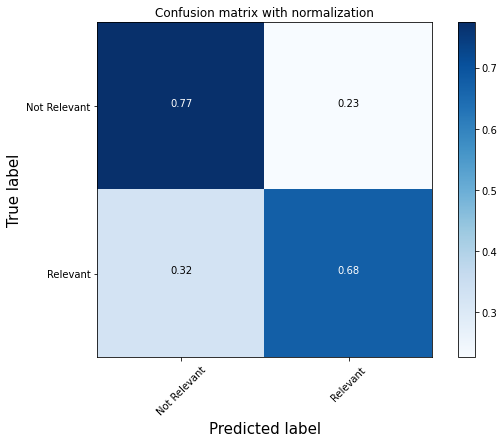

In [46]:
y_pred_class = training_model.predict(X_test)
y_preds_bin = y_pred_class > 0.5
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_preds_bin))
print("Recall:",metrics.recall_score(y_test, y_preds_bin))
print("F1 score:",metrics.f1_score(y_test, y_preds_bin))
cnf_matrix = confusion_matrix(y_test, y_preds_bin)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

Therefore, by introducing a LSTM model, we obtain a prediction outcome with a F1-score of 0.72, which is much worse than the outcomes of the previous algorithms. Therefore, we can conclude that applying a deep learning model with words embeddings somehow overfit the data and thus leading to an inferior prediction results than other algorithms.

#### Other methods of building a LSTM model (Can't be run second time after my first success)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

In [ ]:
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Define the model architecture
model = Sequential()
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


ValueError: ignored

In [ ]:
y_pred_class

array([[0.5465825 ],
       [0.6054017 ],
       [0.59667575],
       ...,
       [0.13271664],
       [0.67237306],
       [0.5749171 ]], dtype=float32)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

262/262 [==============================] - 1s 3ms/step
Accuracy:  0.6660686520751107
Recall: 0.7828226347573249
F1 score: 0.7148692810457516


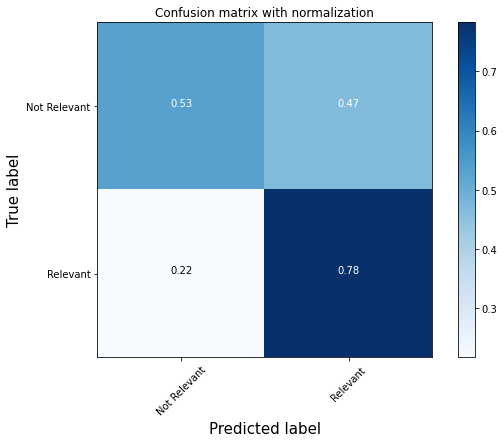

In [ ]:
y_pred_class = model.predict(X_test)
y_preds_bin = y_pred_class > 0.5
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_preds_bin))
print("Recall:",metrics.recall_score(y_test, y_preds_bin))
print("F1 score:",metrics.f1_score(y_test, y_preds_bin))
cnf_matrix = confusion_matrix(y_test, y_preds_bin)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

In [ ]:
# reshape X_train and X_test to have the correct shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/50
392/392 [==============================] - 86s 214ms/step - loss: 0.6679 - accuracy: 0.5909 - val_loss: 0.6470 - val_accuracy: 0.6237
Epoch 2/50
392/392 [==============================] - 81s 206ms/step - loss: 0.6439 - accuracy: 0.6230 - val_loss: 0.6355 - val_accuracy: 0.6366
Epoch 3/50
392/392 [==============================] - 78s 199ms/step - loss: 0.6370 - accuracy: 0.6316 - val_loss: 0.6333 - val_accuracy: 0.6366
Epoch 4/50
392/392 [==============================] - 81s 207ms/step - loss: 0.6344 - accuracy: 0.6305 - val_loss: 0.6359 - val_accuracy: 0.6316
Epoch 5/50
392/392 [==============================] - 81s 206ms/step - loss: 0.6334 - accuracy: 0.6373 - val_loss: 0.6304 - val_accuracy: 0.6356
Epoch 6/50
392/392 [==============================] - 80s 205ms/step - loss: 0.6305 - accuracy: 0.6352 - val_loss: 0.6288 - val_accuracy: 0.6375
Epoch 7/50
392/392 [==============================] - 86s 219ms/step - loss: 0.6309 - accuracy: 0.6359 - val_loss: 0.6258 - val_ac

Accuracy:  0.6660686520751107
Recall: 0.7828226347573249
F1 score: 0.7148692810457516


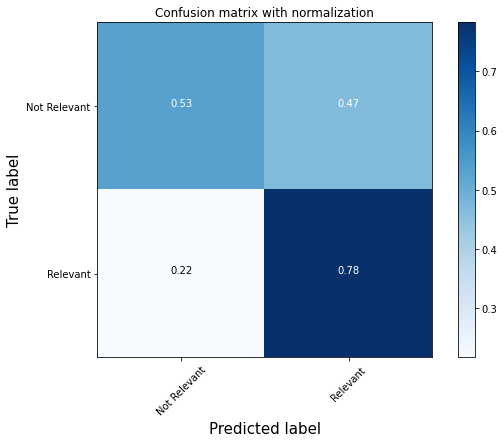

In [ ]:
# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_preds_bin))
print("Recall:",metrics.recall_score(y_test, y_preds_bin))
print("F1 score:",metrics.f1_score(y_test, y_preds_bin))
cnf_matrix = confusion_matrix(y_test, y_preds_bin)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')